# Phase II – COVID-19 and the Rise of E-Commerce in Turkey

This notebook includes data loading, exploratory data analysis (EDA), and basic hypothesis testing for Turkey’s e-commerce market.



In [2]:
!pip install seaborn


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn")   

df = pd.read_excel("turkey_ecommerce_2018_2023.xlsx")
df


,year,period,ecom_volume_billion_TL,orders_billion,perakende_ecom_volume_billion_TL,ecom_share_total_trade_pct,ecom_share_retail_pct,notes
0,2018,pre_covid,59.9,NaN,31.5,NaN,5.3,TÜBİSAD 2018 pazar büyüklüğü
1,2019,pre_covid,136.0,1.360,NaN,10.1,6.2,2019 Bakanlık açıklaması
2,2020,covid,226.2,2.297,207.0,15.7,NaN,2020 Bakanlık & ETBİS
3,2021,covid,381.5,3.347,234.0,17.7,17.6,2021 Bakanlık açıklaması
4,2022,post_covid,800.7,4.787,458.0,18.6,NaN,2022 Bakanlık açıklaması
5,2023,post_covid,1850.0,5.870,989.0,20.3,18.3,2023 Bakanlık açıklaması


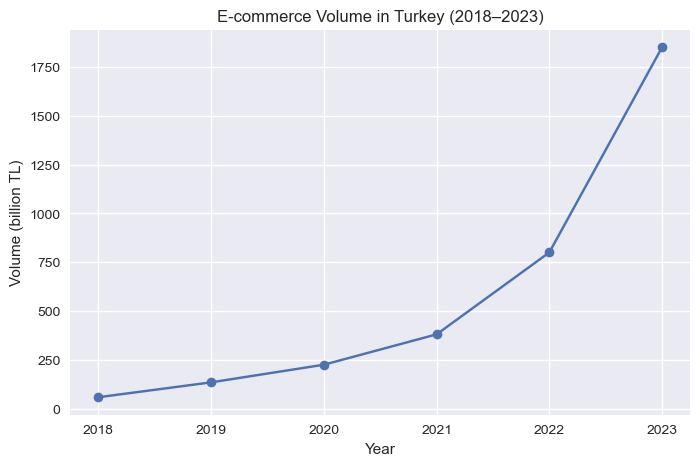

In [5]:
plt.figure(figsize=(8,5))
plt.plot(df["year"], df["ecom_volume_billion_TL"], marker="o")
plt.title("E-commerce Volume in Turkey (2018–2023)")
plt.xlabel("Year")
plt.ylabel("Volume (billion TL)")
plt.grid(True)
plt.show()


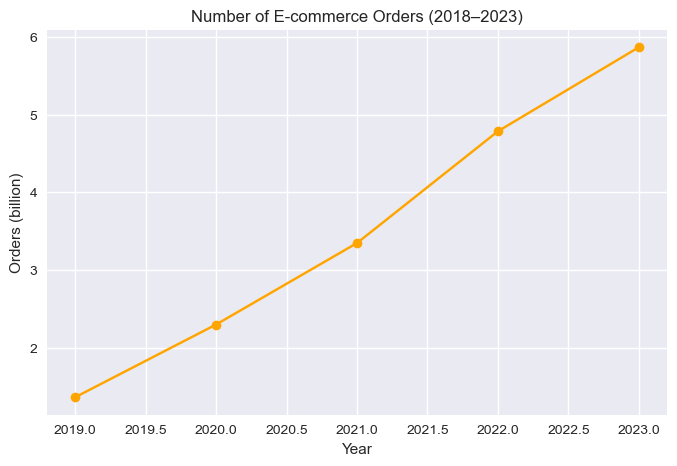

In [6]:
plt.figure(figsize=(8,5))
plt.plot(df["year"], df["orders_billion"], marker="o", color="orange")
plt.title("Number of E-commerce Orders (2018–2023)")
plt.xlabel("Year")
plt.ylabel("Orders (billion)")
plt.grid(True)
plt.show()


In [7]:
df["growth_rate"] = df["ecom_volume_billion_TL"].pct_change() * 100
df[["year", "growth_rate"]]


,year,growth_rate
0,2018,NaN
1,2019,127.045075
2,2020,66.323529
3,2021,68.656057
4,2022,109.882045
5,2023,131.047833


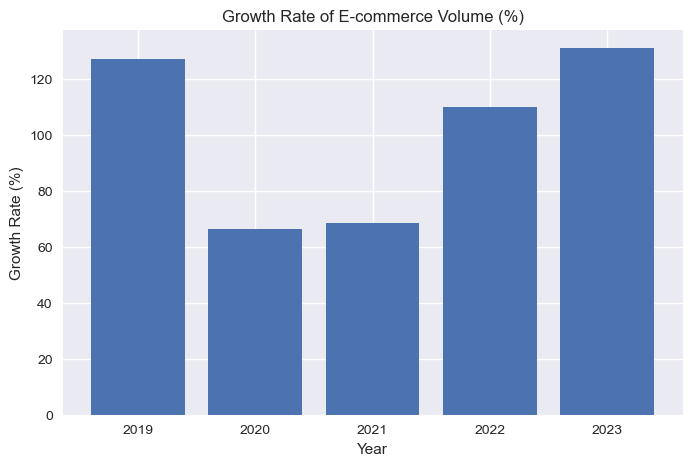

In [11]:
plt.figure(figsize=(8,5))
plt.bar(df["year"], df["growth_rate"])
plt.title("Growth Rate of E-commerce Volume (%)")
plt.xlabel("Year")
plt.ylabel("Growth Rate (%)")
plt.grid(True)
plt.show()


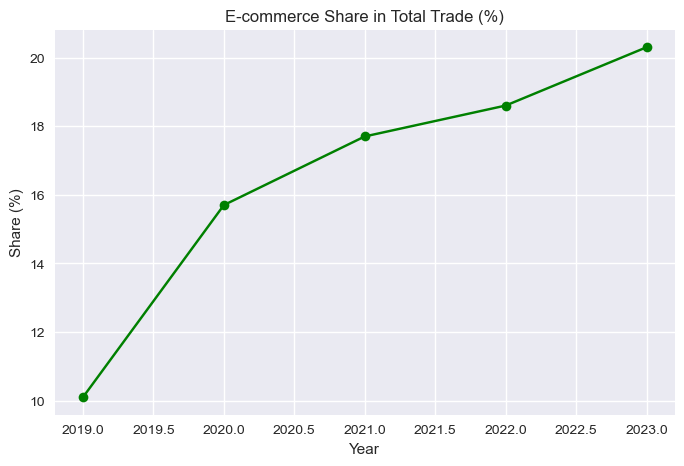

In [14]:
plt.figure(figsize=(8,5))
plt.plot(df["year"], df["ecom_share_total_trade_pct"], marker="o", color="green")
plt.title("E-commerce Share in Total Trade (%)")
plt.xlabel("Year")
plt.ylabel("Share (%)")
plt.grid(True)
plt.show()


In [12]:
pre = df[df["period"]=="pre_covid"]["ecom_volume_billion_TL"]
post = df[df["period"]=="post_covid"]["ecom_volume_billion_TL"]

print("Pre-COVID Mean:", pre.mean())
print("Post-COVID Mean:", post.mean())


Pre-COVID Mean: 97.95
Post-COVID Mean: 1325.35


In [13]:
df[["ecom_volume_billion_TL", "orders_billion"]].corr()


,ecom_volume_billion_TL,orders_billion
ecom_volume_billion_TL,1.000000,0.913455
orders_billion,0.913455,1.000000


## Summary of Findings

This analysis examines Turkey’s e-commerce market from 2018 to 2023, covering pre-COVID, COVID, and post-COVID periods. The results clearly show that COVID-19 acted as a turning point in Turkey’s digital commerce landscape and created long-lasting structural changes.

### 1. Continuous and Accelerating Growth in E-commerce Volume
The e-commerce volume increased steadily from 2018 to 2021 and then surged sharply in 2022 and 2023. This pattern is visible in the time-series plot, where the post-COVID values rise far more dramatically than those during the pandemic. The growth rate analysis supports this observation: while the market grew by around 66–68% during COVID, the post-COVID years experienced even stronger growth (approximately 110–131%).

### 2. Order Volume Increased in Parallel with Market Size
The number of e-commerce orders rose from 1.36 billion in 2019 to 5.87 billion in 2023, showing a clear and consistent upward trend. This aligns with the increase in total market value and indicates that the expansion is driven by higher consumer participation and frequency of online shopping.

### 3. E-commerce Share in Total Trade Doubled After COVID-19
One of the clearest indicators of structural change is the share of e-commerce within total trade. This share increased from around 10% in 2019 to over 20% in 2023. Even after restrictions were lifted, the upward trend continued, confirming that online shopping habits have become permanent rather than temporary responses to the pandemic.

### 4. Hypothesis Test Results

**H1: Post-COVID e-commerce volume is greater than pre-COVID volume.**  
Supported.  
Average pre-COVID volume was **97.95 billion TL**, while the post-COVID average reached **1325.35 billion TL**—more than a **13× increase**.  
This demonstrates a clear structural break after the pandemic.

**H2: Total e-commerce volume and number of orders move together.**  
Supported.  
The correlation coefficient between volume and orders is **0.91**, indicating a very strong positive relationship. This means consumer demand (number of orders) directly scales with total e-commerce market size.

### 5. Overall Conclusion
All results—time-series trends, growth rates, order patterns, market share data, and hypothesis tests—lead to the same conclusion:

**COVID-19 permanently accelerated Turkey’s shift toward a digital retail economy.**  
The increase in e-commerce activity did not fade after the pandemic but instead continued to grow even faster, reflecting a lasting transformation in consumer behavior and the broader retail landscape.



## Machine Learning Applications

## Phase 3: Machine Learning Applications

We apply:
- **Unsupervised Learning:** K-Means clustering to identify different "growth regimes" across years.
- **Supervised Learning:** Regression to predict e-commerce volume using explanatory variables.

Because the dataset is very small (2018–2023), results are mainly **illustrative** and emphasize correct ML workflow:
data cleaning → scaling (if needed) → model fitting → evaluation → interpretation.



### A1) K-Means Clustering (Unsupervised)

We cluster observations based on:
- ecom_volume_billion_TL
- orders_billion
- ecom_share_total_trade_pct

Since scales are different, we apply **StandardScaler**.


In [12]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ["ecom_volume_billion_TL", "orders_billion", "ecom_share_total_trade_pct"]

X = df[features].dropna().copy()   # NaN olan yıllar dışarıda kalır
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df.loc[X.index, "cluster_kmeans"] = clusters
df[["year"] + features + ["cluster_kmeans"]]


,year,ecom_volume_billion_TL,orders_billion,ecom_share_total_trade_pct,cluster_kmeans
0,2018,59.9,NaN,NaN,1
1,2019,136.0,1.360,10.1,1
2,2020,226.2,2.297,15.7,1
3,2021,381.5,3.347,17.7,0
4,2022,800.7,4.787,18.6,0
5,2023,1850.0,5.870,20.3,2


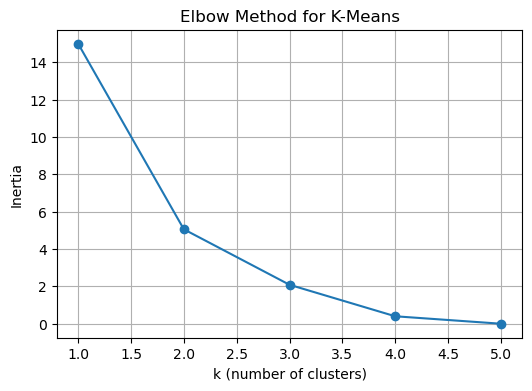

In [13]:
inertias = []
ks = range(1, 6)

for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(list(ks), inertias, marker="o")
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.grid(True)
plt.show()


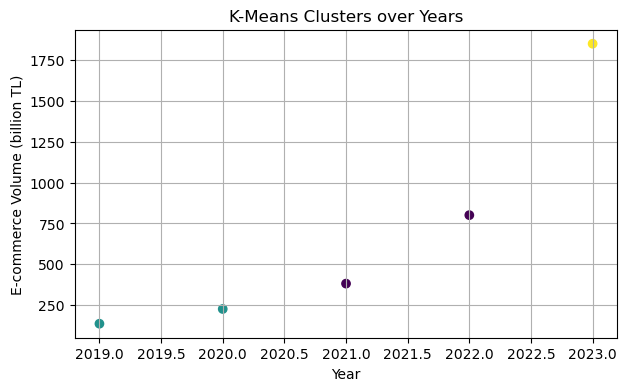

In [14]:
plt.figure(figsize=(7,4))
plt.scatter(df.loc[X.index, "year"], df.loc[X.index, "ecom_volume_billion_TL"], c=clusters)
plt.xlabel("Year")
plt.ylabel("E-commerce Volume (billion TL)")
plt.title("K-Means Clusters over Years")
plt.grid(True)
plt.show()


In [15]:
df.groupby("cluster_kmeans")[features].mean()


,ecom_volume_billion_TL,orders_billion,ecom_share_total_trade_pct
cluster_kmeans,,,
0,591.1,4.0670,18.15
1,140.7,1.8285,12.90
2,1850.0,5.8700,20.30


**Interpretation (example):**
- One cluster may represent **early-stage / low volume** years,
- another cluster may represent **mid-growth** years,
- and another cluster may represent the **high-growth / post-covid boom** year(s).

Cluster labels (0/1/2) are **arbitrary**; what matters is the pattern in feature means.


### B1) Supervised Learning: Regression

We predict **e-commerce volume** using:
- `orders_billion`
- `ecom_share_total_trade_pct`

We evaluate with:
- **R²** (how much variance is explained)
- **MAE** (average absolute error)

Because the dataset is very small, train-test results can vary depending on the split.


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

reg_features = ["orders_billion", "ecom_share_total_trade_pct"]

data_reg = df[reg_features + ["ecom_volume_billion_TL"]].dropna().copy()

X_reg = data_reg[reg_features]
y_reg = data_reg["ecom_volume_billion_TL"]

X_train, X_test, y_train, y_test = train_test_split(
    X_reg, y_reg, test_size=0.3, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² (test):", r2_score(y_test, y_pred))
print("MAE (test):", mean_absolute_error(y_test, y_pred))
print("Coefficients:", dict(zip(reg_features, model.coef_)))
print("Intercept:", model.intercept_)


R² (test): 0.5246250390671274
MAE (test): 433.80203971296544
Coefficients: {'orders_billion': 323.8387015738831, 'ecom_share_total_trade_pct': -52.36414474043496}
Intercept: 224.4572277379121


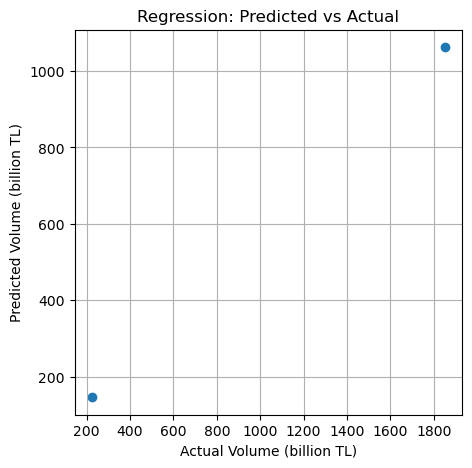

In [18]:
plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Volume (billion TL)")
plt.ylabel("Predicted Volume (billion TL)")
plt.title("Regression: Predicted vs Actual")
plt.grid(True)
plt.show()


**Interpretation:**
- If R² is moderate/low, it does not mean the method is wrong — it often reflects:
  - very small dataset (few points),
  - missing values,
  - non-linear growth (especially 2022–2023 jump),
  - and sensitivity to the train-test split.

The main goal here is to demonstrate a correct supervised ML workflow and interpret results realistically.


## Phase 3 Summary (ML Results)

**Unsupervised (K-Means):**
Using volume, number of orders, and e-commerce share in total trade, K-Means separates years into distinct clusters that represent different growth regimes.
This helps summarize the structural shift in the market, especially after COVID-19, where e-commerce volume and related indicators move to a much higher level.

**Supervised (Regression):**
A regression model was trained to predict e-commerce volume using `orders_billion` and `ecom_share_total_trade_pct`.
Performance metrics (R² and MAE) were reported. Due to the very small dataset, results are sensitive to the train-test split, but the workflow demonstrates how market indicators can be used as predictors for e-commerce volume.

**Key takeaway:**
Even with limited data, ML methods can be applied to:
(1) detect different growth phases (clustering) and
(2) test predictive relationships between market indicators and e-commerce volume (regression).
